# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [ ]:
import re
import nltk

# punkt is used to divide a text into a list of sentences.
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# 'stopwords' is a list of commonly used words in the English language that are used to filter out irrelevant words.
nltk.download('stopwords')
from nltk.corpus import stopwords

# 'wordnet' is a lexical database for the English language that is used to perform part-of-speech tagging.
nltk.download('wordnet')
from nltk.corpus import wordnet

# perform lemmatization on a text input
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Additional resources used to perform part-of-speech tagging
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 35
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | It seems that there is a race t...
1,Not Verified | As a Spanish born individual l...
2,✅ Trip Verified | A rather empty and quiet fl...
3,✅ Trip Verified | Easy check in and staff mem...
4,✅ Trip Verified | Being a silver flyer and bo...


In [ ]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
print(f"We have successfully collected {df.shape[0]} reviews from British Airways website.")

We have successfully collected 3460 reviews from British Airways website.


In [ ]:
df["reviews"][0]

'Not Verified | It seems that there is a race to the bottom amongst airlines. I cannot even check in because BA requires the submission of documents for Covid restrictions. However the form to start the submission process is hopelessly broken. After clicking "submit" the form just hangs forever. No error message is given. I tried three different browsers on three different devices. All have the same hang. Which means you cannot check in online nor can you select a seat. I tried using the chat bot, but after 30 minutes of clicking "try again" I thought I had donated enough time to BA. '

In [ ]:
df["reviews"][2]

"✅ Trip Verified |  A rather empty and quiet flight to Tel Aviv, very friendly cabin crew and due to the emptiness of the flight I had an entire row to myself which allowed me to work easily and have as much space as required. Unfortunately upon landing the breaks overheated and we had to wait for the fire crew to cool them down which delayed us. Otherwise an overall excellent flight on BA's part. This was the first time I have flown this flight and it has actually taken off at the correct time."

### Removing unnecessary text before | in the reviews. 

In [ ]:
df["reviews"] = df["reviews"].str.split('|',expand=True)[1]

In [ ]:
df.head(3)

,reviews
0,It seems that there is a race to the bottom a...
1,As a Spanish born individual living in Engla...
2,"A rather empty and quiet flight to Tel Aviv,..."


### Clean reviews 

In [ ]:
# Define a function to clean the text
def clean(text):
  """
  This function takes in an input of text and uses the re.sub() method to remove all special characters and numericals, leaving only the alphabets. 
  =================================================================================================================================================
  parameters: text->raw string data
  returns: text-> processed clean data
  """
  text = re.sub('[^A-Za-z]+', ' ', str(text))
  return text

In [ ]:
# Cleaning the text in the review column
df['Cleaned_reviews'] = df['reviews'].map(clean)
df.head()

,reviews,Cleaned_reviews
0,It seems that there is a race to the bottom a...,It seems that there is a race to the bottom a...
1,As a Spanish born individual living in Engla...,As a Spanish born individual living in Englan...
2,"A rather empty and quiet flight to Tel Aviv,...",A rather empty and quiet flight to Tel Aviv v...
3,Easy check in and staff member was polite an...,Easy check in and staff member was polite and...
4,Being a silver flyer and booking a flight th...,Being a silver flyer and booking a flight thr...


In [ ]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}


def token_stop_pos(text):
  """
  This function takes reviews as text and performs following:
    - tokenize the text into a list of words.
    - remove the stop words from the list of tokenized words.
    - perform part-of-speech tagging on the list of tokenized words.
  ==================================================================
  parameters: text -> processed clean data
  Returns: newlist -> List
  """
  # tokenize the text into a list of words.
  tags = pos_tag(word_tokenize(text))
  processed_data = []
  
  # remove the stop words from the list of tokenized words and perform part-of-speech tagging on the list of tokenized words.
  for word, tag in tags:
    if word.lower() not in set(stopwords.words('english')):
      processed_data.append(tuple([word, pos_dict.get(tag[0])]))
  return processed_data 

In [ ]:
df['POS_tagged'] = df['Cleaned_reviews'].map(token_stop_pos)
df.head()

,reviews,Cleaned_reviews,POS_tagged
0,It seems that there is a race to the bottom a...,It seems that there is a race to the bottom a...,"[(seems, v), (race, n), (bottom, a), (amongst,..."
1,As a Spanish born individual living in Engla...,As a Spanish born individual living in Englan...,"[(Spanish, a), (born, v), (individual, a), (li..."
2,"A rather empty and quiet flight to Tel Aviv,...",A rather empty and quiet flight to Tel Aviv v...,"[(rather, r), (empty, a), (quiet, a), (flight,..."
3,Easy check in and staff member was polite an...,Easy check in and staff member was polite and...,"[(Easy, a), (check, n), (staff, n), (member, n..."
4,Being a silver flyer and booking a flight th...,Being a silver flyer and booking a flight thr...,"[(silver, n), (flyer, n), (booking, v), (fligh..."


In [ ]:
# Obtaining the stem words – Lemmatization
def lemmatize(pos_data):
  """
  This function takes pos_dataas  list of tuples containing words and their corresponding part-of-speech tags and performs lemmatization.
  =======================================================================================================================================
  parameters: pos_data - > List
  returns lemma_review -> string
  """
  # initialize empty string.
  lemma_review = " "
  # iterate over the list of tuples and for each word and pos pair
  for word, pos in pos_data:
    # if pos variable is empty assign the word to a variable "lemma" and adds it to the "lemma_review" string.
    # if pos variable is not empty obtain the lemma of the word.
    if not pos:
      lemma = word
      lemma_review = lemma_review + " " + lemma
    else:
      lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
      lemma_review = lemma_review + " " + lemma
  return lemma_review

In [ ]:
df['Lemma'] = df['POS_tagged'].map(lemmatize)
df.head()

,reviews,Cleaned_reviews,POS_tagged,Lemma
0,It seems that there is a race to the bottom a...,It seems that there is a race to the bottom a...,"[(seems, v), (race, n), (bottom, a), (amongst,...",seem race bottom amongst airline even check ...
1,As a Spanish born individual living in Engla...,As a Spanish born individual living in Englan...,"[(Spanish, a), (born, v), (individual, a), (li...",Spanish bear individual living England use B...
2,"A rather empty and quiet flight to Tel Aviv,...",A rather empty and quiet flight to Tel Aviv v...,"[(rather, r), (empty, a), (quiet, a), (flight,...",rather empty quiet flight Tel Aviv friendly ...
3,Easy check in and staff member was polite an...,Easy check in and staff member was polite and...,"[(Easy, a), (check, n), (staff, n), (member, n...",Easy check staff member polite helpful make ...
4,Being a silver flyer and booking a flight th...,Being a silver flyer and booking a flight thr...,"[(silver, n), (flyer, n), (booking, v), (fligh...",silver flyer book flight BA Dublin would thi...


### Sentiment Analysis using VADER
> VADER stands for Valence Aware Dictionary and Sentiment Reasoner.
> Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [ ]:
# function to calculate vader sentiment
def vadersentimentanalysis(review):
  #  calculate the sentiment of the text
  vs = analyzer.polarity_scores(review)
  return vs['compound']

In [ ]:
df['Sentiment'] = df['Lemma'].map(vadersentimentanalysis)

In [ ]:
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
df['Analysis'] = df['Sentiment'].map(vader_analysis)
df.head()

,reviews,Cleaned_reviews,POS_tagged,Lemma,Sentiment,Analysis
0,It seems that there is a race to the bottom a...,It seems that there is a race to the bottom a...,"[(seems, v), (race, n), (bottom, a), (amongst,...",seem race bottom amongst airline even check ...,-0.7906,Negative
1,As a Spanish born individual living in Engla...,As a Spanish born individual living in Englan...,"[(Spanish, a), (born, v), (individual, a), (li...",Spanish bear individual living England use B...,0.8580,Positive
2,"A rather empty and quiet flight to Tel Aviv,...",A rather empty and quiet flight to Tel Aviv v...,"[(rather, r), (empty, a), (quiet, a), (flight,...",rather empty quiet flight Tel Aviv friendly ...,0.4019,Neutral
3,Easy check in and staff member was polite an...,Easy check in and staff member was polite and...,"[(Easy, a), (check, n), (staff, n), (member, n...",Easy check staff member polite helpful make ...,0.9723,Positive
4,Being a silver flyer and booking a flight th...,Being a silver flyer and booking a flight thr...,"[(silver, n), (flyer, n), (booking, v), (fligh...",silver flyer book flight BA Dublin would thi...,0.7783,Positive


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Neutral     1743
Positive    1036
Negative     681
Name: Analysis, dtype: int64

In [ ]:
list(df['Analysis'].value_counts().values)

[1743, 1036, 681]

In [ ]:
!pip install plotly-express

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Visual representation

##### Pie chart

In [ ]:
colors = ['lightyellow', 'green', 'red']

fig = go.Figure(data=[go.Pie(labels=list(df['Analysis'].value_counts().index),
                             values=list(df['Analysis'].value_counts().values), textinfo='label+percent')])
fig.update_traces(title_text="Reviews Analysis",title_font=dict(size=30), textfont_size=20,marker=dict(colors=colors, line=dict(color='#000000', width=2)) )
fig.show()

##### Word cloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
  wordcloud = WordCloud(background_color='lightblue', stopwords=stopwords, colormap='Set1', 
                        max_font_size=35, scale=3, random_state=1)

  wordcloud  =wordcloud.generate(str(data))

  fig = plt.figure(1, figsize=(12, 12))
  plt.axis('off')

  plt.imshow(wordcloud)
  plt.show()

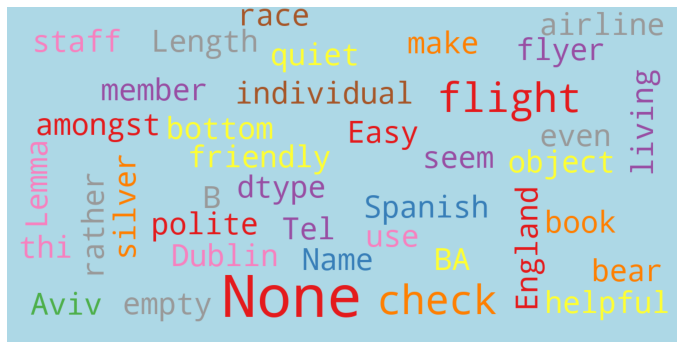

In [ ]:
show_wordcloud(df.Lemma)